In [411]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# NP Necessary imports

In [412]:
A_V = 3
# NP Visual extinction in atmosphere
alpha = 1.8
# NP Wavelength dependence in atmosphere
l_B = 4450
# NP Blue wavelength in Angstroms
l_V = 5510
# NP Visual wavelength in Angstroms
A_B = A_V * (l_B/l_V)**(-1 *alpha)
# NP B extinction calculation
print('A_B: ' +format(A_B, '.2E') +' mag')
# NP Printing result
EBminusV = A_B - A_V
# NP Reddening calculation
print('E(B-V): ' +format(EBminusV, '.2E') +' mag')
# NP Printing result
BminusV_0 = 0.65
# NP Sun's intrinsic color
BminusV = BminusV_0 +A_B -A_V
# NP Calculating Sun's observed color
print('B-V: ' +format(BminusV, '.2E') +' mag')
# NP Printing result
R_V = A_V/EBminusV
# NP Calculating relative visibility, R_V
print('R_V: ' +format(R_V, '.2E'))
# NP Printing result

A_B: 4.41E+00 mag
E(B-V): 1.41E+00 mag
B-V: 2.06E+00 mag
R_V: 2.13E+00


In [413]:
R_VMW = 3.1
# NP Milky Way relative visibility
alphamw = -1*np.log((1 +R_VMW)/R_VMW)/np.log(l_B/l_V)
# NP Calculating wavelength dependence for Milky Way relative
# NP visibility
print('alpha_MW: ' +format(alphamw, '.2E'))

alpha_MW: 1.31E+00


In [414]:
print('CORE:')
# NP Printing label for this section
X = 0.5
# NP Hydrogen fraction in core
K_Tc = 0.2* (1 +X)
# NP Opacity in Sun's core
print('Opacity: ' +format(K_Tc, '.2E') +' cm^2 g^-1')
# NP Printing result
rho_C = 100
# NP Approximate density in Sun's core
l_core = 1 /(K_Tc *rho_C)
# NP Mean free path in Sun's core
print('l_ph: ' +format(l_core, '.2E') +' cm')
# NP Printing result
R_o = 6.957e8
# NP Defining solar radius in meters
d_c = 0.25 *(R_o *1e2)
# NP Calculating distance traveled by photon in cm
N_core = (d_c/l_core) **2
# Calculating number of steps taken by photon
print('Steps taken: ' +format(N_core, '.2E'))
# NP Displaying result
c = 3e8
# NP Defining speed of light in m/s
t_core = N_core *(l_core /(c *10**2))
# NP Calculating timescale
print('Timescale: ' +format(t_core/(np.pi *10**7), '.2E') \
    +' years')
# NP Printing result

CORE:
Opacity: 3.00E-01 cm^2 g^-1
l_ph: 3.33E-02 cm
Steps taken: 2.72E+23
Timescale: 9.63E+03 years


In [415]:
print('Middle:')
# NP Printing label for this section
K_Tm = 1
# NP Opacity in Sun, middle
rho_m = 1
# NP Density in Sun, middle
l_m = 1 /(K_Tm *rho_m)
# NP Mean free path in Sun, middle
print('l_ph: ' +format(l_m, '.2E') +' cm')
# NP Printing result
d_m = (0.7 -0.25) *(R_o *1e2)
# NP Calculating distance traveled by photon in cm
N_m = (d_m/l_m) **2
# Calculating number of steps taken by photon
print('Steps taken: ' +format(N_m, '.2E'))
# NP Displaying result
t_m = N_m *(l_m /(c *10**2))
# NP Calculating timescale
print('Timescale: ' +format(t_m/(np.pi *10**7), '.2E') \
    +' years')
# NP Printing result

Middle:
l_ph: 1.00E+00 cm
Steps taken: 9.80E+20
Timescale: 1.04E+03 years


In [416]:
print('Envelope:')
# NP Printing label for this section
M_o = 2*10**30
# NP Defining mass of Sun in kg
L_o = 3.828*10**26
# NP Defining bolometric luminosity of Sun
M_env = 0.02 *M_o
# NP Defining envelope mass
R_env = 0.3 *R_o
# NP Defining envelope radius
t_env = (M_env *R_o *R_env /L_o) **(1/3)
print('Timescale: ' +format(t_env/(np.pi *10**7), '.2E') \
     +' years')

Envelope:
Timescale: 7.88E-02 years


In [417]:
t_esc = t_core +t_m +t_env
# NP Calculating total escape time
print('t_esc: ' +format(t_esc/(np.pi *10**7), '.2E') +' years')
# NP Printing result

t_esc: 1.07E+04 years


In [427]:
t_rad = (1-0.7) *R_o *1e2 *0.02 *M_o *1e3 *103 /(4 \
    *np.pi *(0.85 *R_o *1e2)**2 *c *1e2)
# NP Calculating radiative timescale
print('Timescale: ' +format(t_rad/(np.pi*10**7), '.2E')\
    +' years')
# NP Printing result

Timescale: 2.08E+03 years


In [446]:
f1 = (7/4)*np.exp(-2/3)
# NP Calculating ratio of flux below photosphere
print('Ratio of flux emitted below photosphere: '\
    +format(f1, '.2E'))
# NP Printing result

Ratio of flux emitted below photosphere: 8.98E-01


In [447]:
f2 = (27/8) *(6 -(314 *np.exp(-2/3)/27))
# NP Calculating ratio of flux above photosphere
print('Ratio of flux emitted below photosphere: '\
    +format(f2, '.2E'))
# NP Printing result

Ratio of flux emitted below photosphere: 9.84E-02


In [448]:
ftot = f1 +f2
# NP Calculating totals
print('Total flux: ' +format(ftot, '.2E'))
# NP Printing Result

Total flux: 9.97E-01


In [449]:
opa = pd.read_csv('/d/users/nikhil/Downloads/OPAL_SolarComposition.txt')
# NP Reading in raw text file
goodopa = opa.to_numpy()
# NP Converting to numpy array
betteropa = [np.fromstring(goodopa[i][0], dtype = float, sep = ' ').tolist()\
    for i in range(len(goodopa))]
# NP Creating a table for opacities and temps., skipping first row
bestopa = [betteropa[i+1][1:] for i in range(len(betteropa) -1)]
# NP Creating a list of only opacities
row_lengths = []
for row in bestopa:
    row_lengths.append(len(row))
max_length = max(row_lengths)
for row in bestopa:
    while len(row) < max_length:
        row.append(None)
pristineopa = np.array(bestopa)
# NP Creating numpy array of opacities to better parse through array
logTs = np.array([betteropa[i+1][0] for i in range(len(betteropa)-1)])
# NP Creating array of temperatures
Tgrid = np.array([[t for r in range(len(logRs))] for t in logTs])
# NP Creating 2D numpy array of temperatures
logRs = np.array(np.fromstring(goodopa[0][0][6:], dtype = float, sep = ' '))
# NP Creating array of R's
Rgrid = np.array([[r for r in logRs] for t in range(len(logTs))])
# NP Creating 2D numpy array of temperatures

/tmp/ipykernel_315015/361661287.py:5: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  betteropa = [np.fromstring(goodopa[i][0], dtype = float, sep = ' ').tolist()\


In [451]:
rhos = np.array([np.array([np.round(r +3 *(t -6) ,3) for r in logRs])\
    for t in logTs])

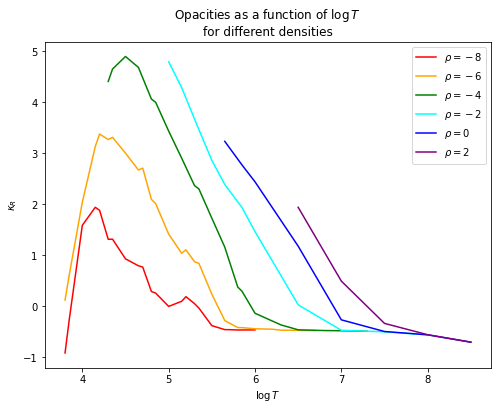

In [453]:
ineight = (np.abs(rhos+8) < 0.1)
insix = (np.abs(rhos+6) < 0.1)
infour = (np.abs(rhos+4) < 0.1)
intwo = (np.abs(rhos+2) < 0.1)
izero = (np.abs(rhos+0) < 0.1)
itwo = (np.abs(rhos-2) < 0.1)
# NP Creating indices for each density
plt.figure(figsize = [8, 6])
# NP Making figure larger
plt.plot(Tgrid[ineight], pristineopa[ineight], 'r', label = r'$\rho=-8$')
plt.plot(Tgrid[insix], pristineopa[insix], color = 'orange', label = r'$\rho=-6$')
plt.plot(Tgrid[infour], pristineopa[infour], 'g', label = r'$\rho=-4$')
plt.plot(Tgrid[intwo], pristineopa[intwo], color = 'cyan', label = r'$\rho=-2$')
plt.plot(Tgrid[izero], pristineopa[izero], color = 'blue', label = r'$\rho=0$')
plt.plot(Tgrid[itwo], pristineopa[itwo], color = 'purple', label = r'$\rho=2$')
# NP Plotting opacity as a function of T for each opacity
plt.xlabel(r'$\logT$')
plt.ylabel(r'$\kappa_R$')
# NP Labeling axes
plt.legend()
# NP Creating legend
plt.title(r'Opacities as a function of $\logT$' +'\n'
    'for different densities')
# NP Creating title
plt.savefig('/d/www/nikhil/public_html/ASTR5420/images/'
    'opacitiesdensities.png')
# NP Saving figure

In [457]:
kramer = pristineopa[np.argwhere(logTs == 6)[0][0]]\
    [np.argwhere(logRs == -3.0)[0][0]]
# NP Finding Kramer opacity from table
C = kramer -rhos[np.argwhere(logTs == 6)[0][0]]\
    [np.argwhere(logRs == -3.0)[0][0]] +3.5*\
    (Tgrid[np.argwhere(logTs == 6)[0][0]]\
    [np.argwhere(logRs == -3.0)[0][0]])
# NP Calculating C
kgrid = np.array([[C +rhos[t][r] -3.5*Tgrid[t][r] for\
    r in range(len(Tgrid[t]))] for t in range(len(Tgrid))])
# NP Creating kramer opacities for each point in table
print('logC = ' +str(C))
# NP Printing result

logC = 24.585


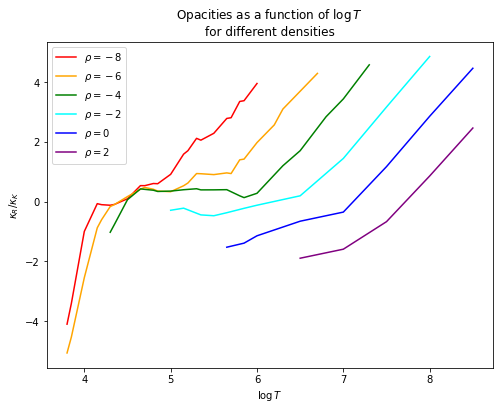

In [458]:
plt.figure(figsize = [8, 6])
# NP Making figure larger
plt.plot(Tgrid[ineight], pristineopa[ineight]-kgrid[ineight],\
    'r', label = r'$\rho=-8$')
plt.plot(Tgrid[insix], pristineopa[insix]-kgrid[insix],\
    color = 'orange', label = r'$\rho=-6$')
plt.plot(Tgrid[infour], pristineopa[infour]-kgrid[infour],\
    'g', label = r'$\rho=-4$')
plt.plot(Tgrid[intwo], pristineopa[intwo]-kgrid[intwo],\
    color = 'cyan', label = r'$\rho=-2$')
plt.plot(Tgrid[izero], pristineopa[izero]-kgrid[izero],\
    color = 'blue', label = r'$\rho=0$')
plt.plot(Tgrid[itwo], pristineopa[itwo]-kgrid[itwo], color\
    = 'purple', label = r'$\rho=2$')
# NP Plotting difference in log of opacities for each density
plt.xlabel(r'$\logT$')
plt.ylabel(r'$\kappa_R/\kappa_K$')
# NP Labeling axes
plt.legend()
# NP Creating legend
plt.title(r'Opacities as a function of $\logT$' +'\n'
    'for different densities')
# NP Creating title for plot
plt.savefig('/d/www/nikhil/public_html/ASTR5420/images/opacity'
    'densitydeviation.png')
# NP Saving figure